# Census Income Project

In [1]:
# importing Libraries

import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [82]:
#Reading DF
df=pd.read_csv('CIP_data.csv')

In [83]:
# First 5 rows
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# Last 5 rows
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
# Size of df
df.size

488400

In [6]:
# rows*cols in df
df.shape

(32560, 15)

In [7]:
# Base information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# null values in col `wepp_id`
df[:].isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
# Min value in age column
df.Age.min()

17

In [84]:
# Max value in age column
df.Age.max()

90

In [10]:
df.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
df.Fnlwgt.unique()

array([ 83311, 215646, 234721, ...,  34066,  84661, 257302])

In [12]:
df.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [13]:
df.Education_num.unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [14]:
df.Race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [15]:
df.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [16]:
# <<<<<<<<<< Need to use encoder to encode non-numerical features to numerical features >>>>>>>>>>>>>
for col in df.columns:
    if df[col].dtypes=='object':
        encoder=LabelEncoder()
        df[col]=encoder.fit_transform(df[col])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int64
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int64
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int64
 6   Occupation      32560 non-null  int64
 7   Relationship    32560 non-null  int64
 8   Race            32560 non-null  int64
 9   Sex             32560 non-null  int64
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int64
 14  Income          32560 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [18]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
6,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
7,31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1
8,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1
9,37,4,280464,15,10,2,4,0,2,1,0,0,80,39,1


<AxesSubplot:>

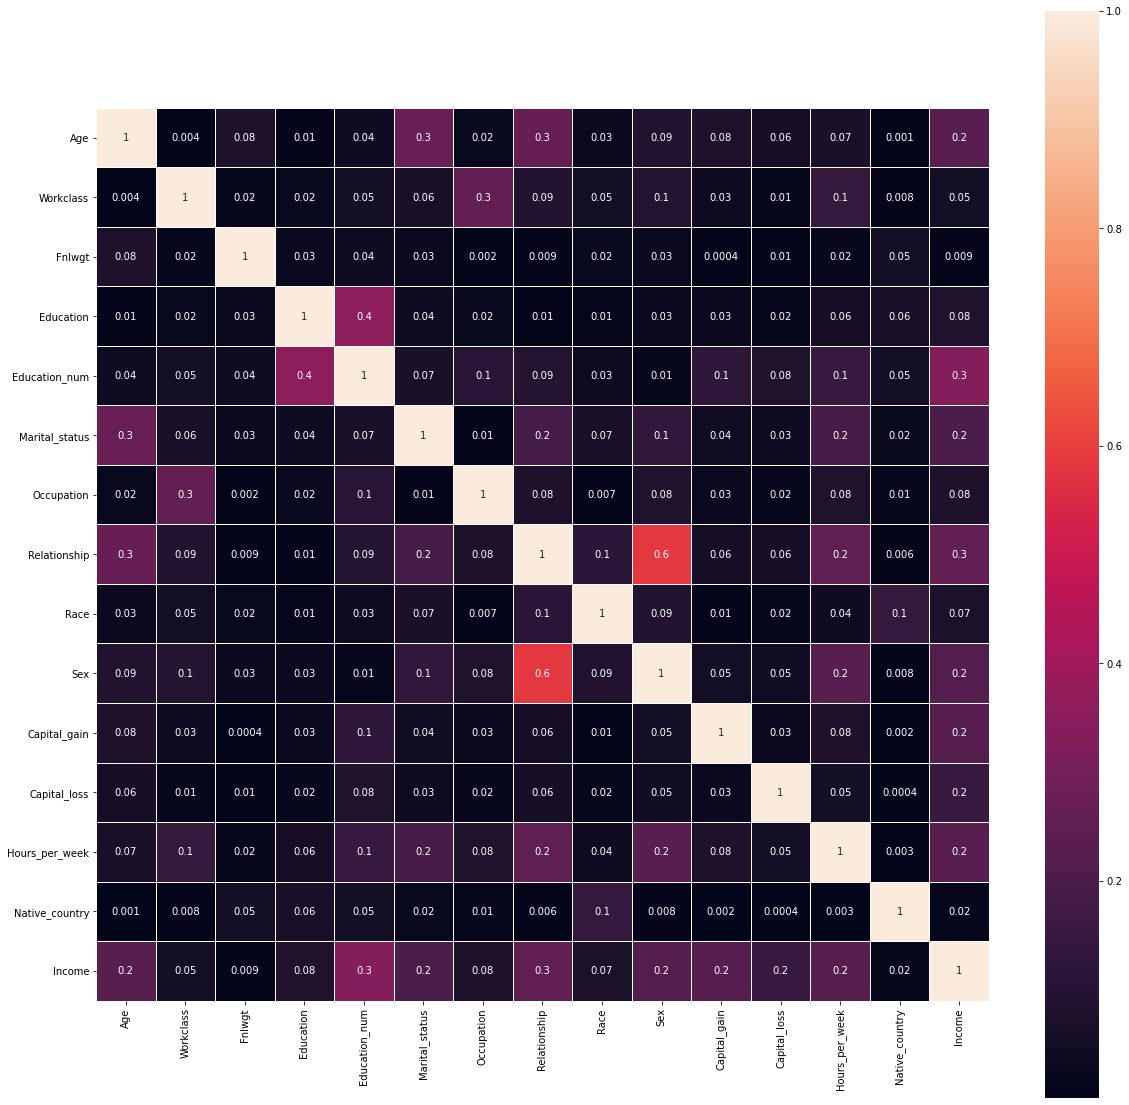

In [19]:
# correlatiion plot for corr<0.5
df_corr=df.corr().abs()
plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot=True,square=True,fmt='.1g',linewidth=1)

<AxesSubplot:>

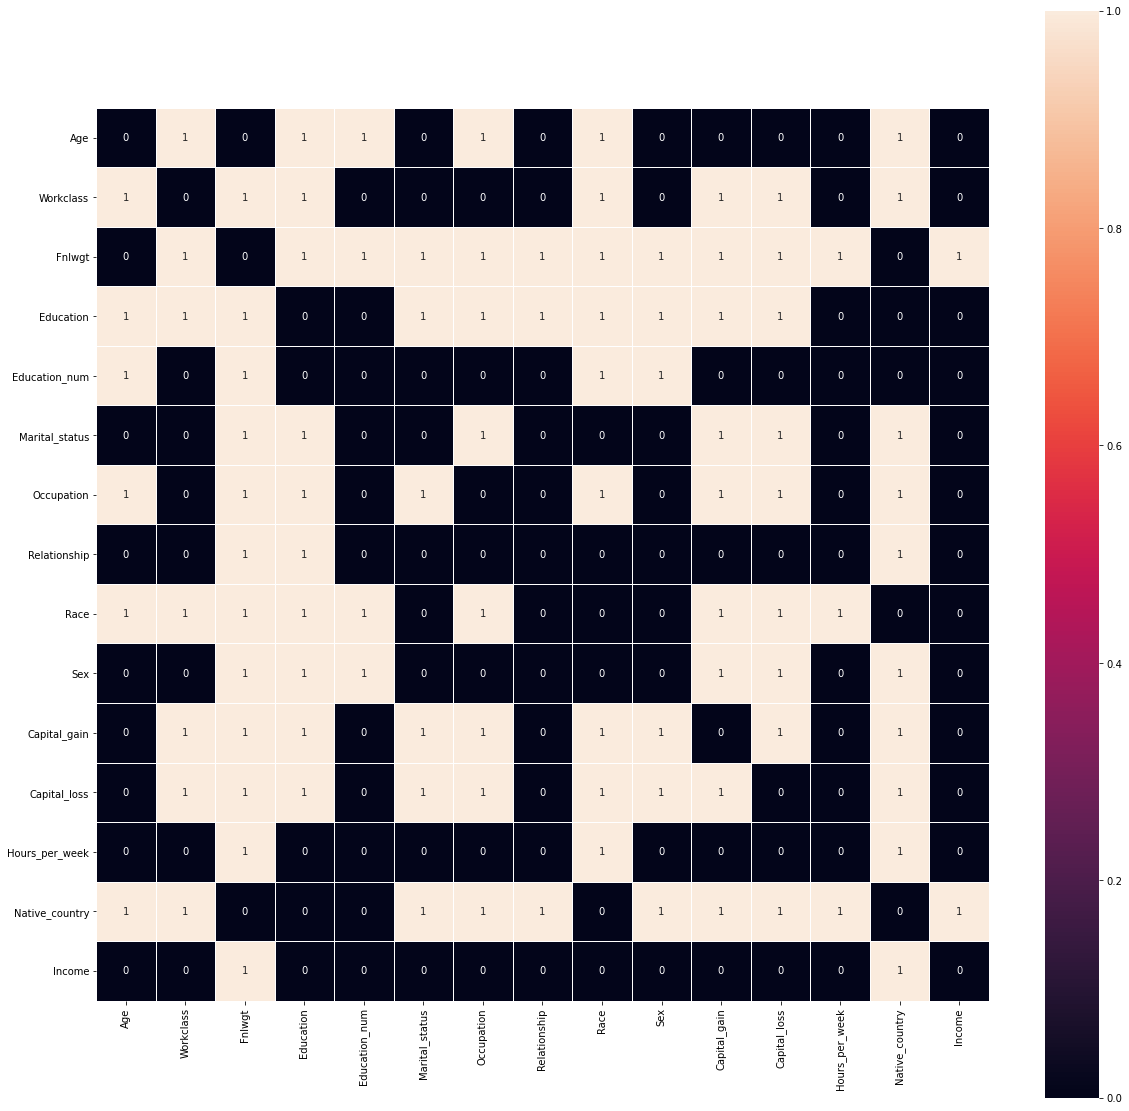

In [20]:
# correlatiion plot for corr<0.5
df_corr=df.corr().abs()
plt.figure(figsize=(20,20))
sns.heatmap(df_corr<0.05,annot=True,square=True,fmt='.1g',linewidth=1)

In [21]:
# Distribution of labels
from collections import Counter

counter = Counter(df['Income'])
print(counter)

Counter({0: 24719, 1: 7841})


In [22]:
# Statistical Description of df
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


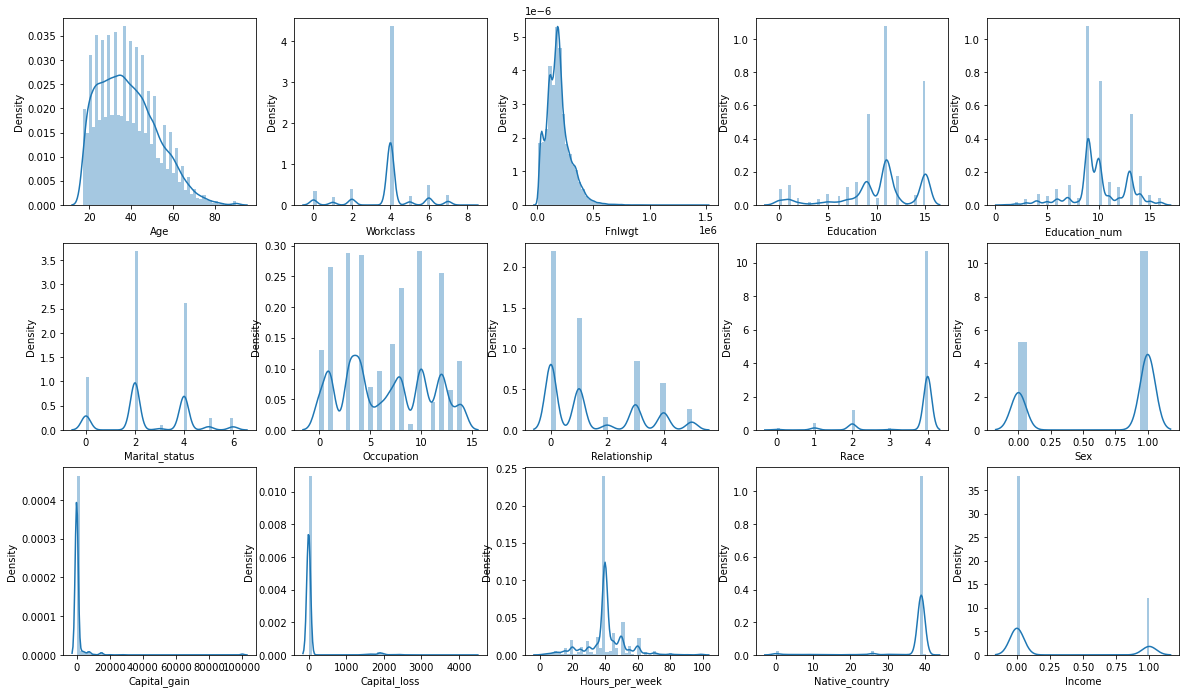

In [23]:
#Distribution of the df
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1

 - Detected skew with probable outliers

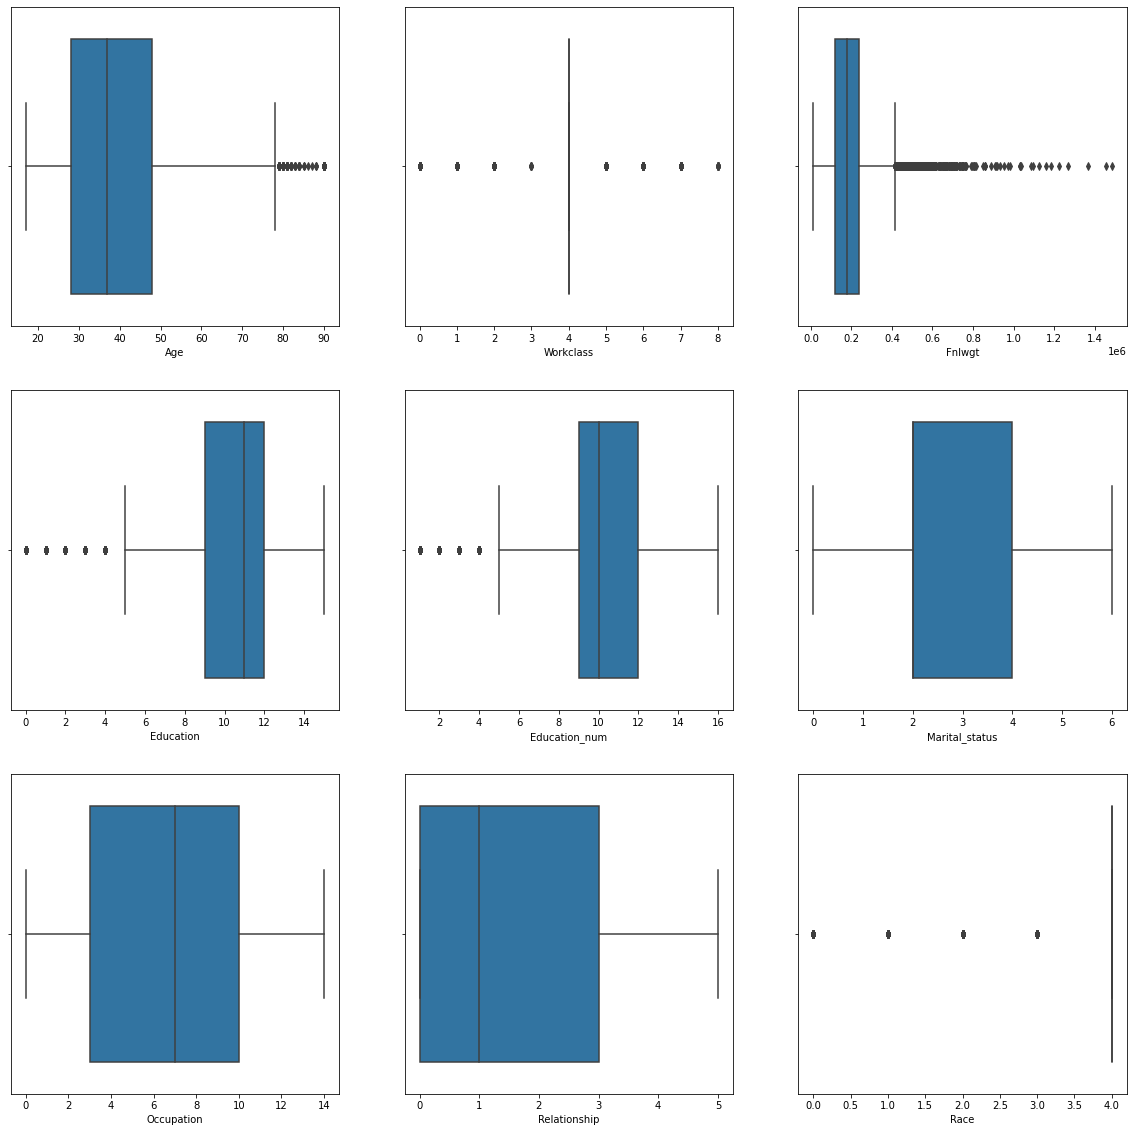

In [24]:
# Detecting Outliers
plt.figure(figsize=(20,20))
plotnumber=1
for i in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber+=1

In [25]:
#Removing outliers using zscore
z=np.abs(stats.zscore(df))
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552]),
 array([13, 12,  8, ...,  8,  8,  8]))

In [26]:
df.shape

(32560, 15)

In [27]:
# Dropping rows where z>3
index=(np.where(z>3)[0])
df=df.drop(df.index[index])

In [28]:
df.shape

(27417, 15)

32560-27417 = 5143 columns dropped<br>
(5143*100)/32560 = 15.79% Data loss

In [29]:
# Skew values before treatment
df.skew()

Age                0.483478
Workclass         -0.738023
Fnlwgt             0.626221
Education         -0.957458
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship       0.750207
Race              -2.592931
Sex               -0.684115
Capital_gain       4.934878
Capital_loss      29.325736
Hours_per_week    -0.358396
Native_country    -5.460675
Income             1.324919
dtype: float64

In [30]:
# separating labels and data to predict primary fuel
x=df.drop(columns=['Income'],axis=1)
y=df['Income']

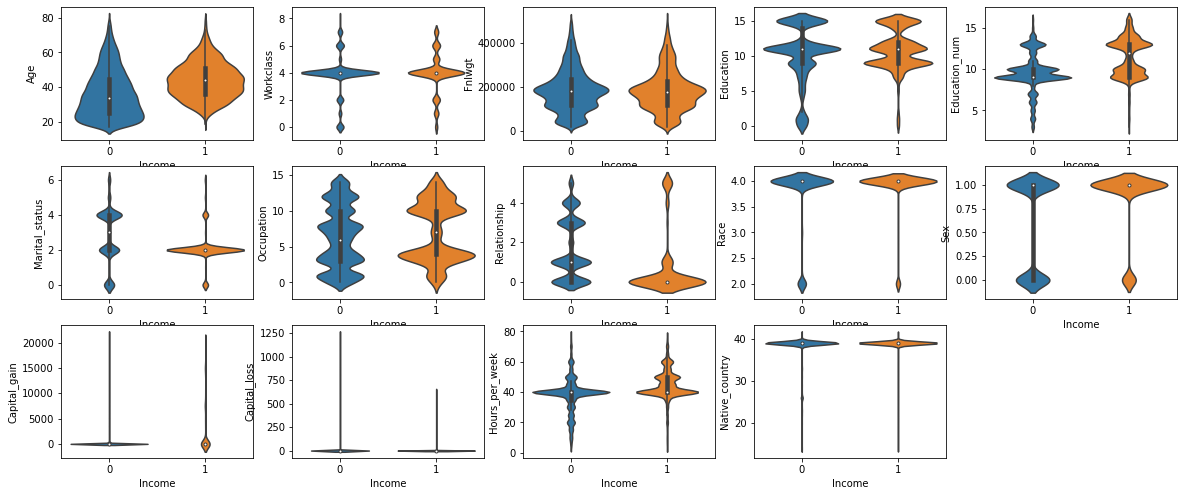

In [31]:
# Relation between features and labels using violin plot
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=35:
        ax=plt.subplot(7,5,plotnumber)
        sns.violinplot(y,x[column])
    plotnumber+=1

In [32]:
# Treating Skew
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_new = power.fit_transform(x)

In [33]:
# Skew values after treatment
data_new=pd.DataFrame(data_new,columns=x.columns)
data_new.skew()

Age               -0.018272
Workclass          0.073827
Fnlwgt            -0.035195
Education         -0.314997
Education_num      0.028000
Marital_status    -0.128651
Occupation        -0.182675
Relationship       0.108587
Race              -2.533505
Sex               -0.684115
Capital_gain       3.069625
Capital_loss      24.623864
Hours_per_week     0.104401
Native_country     0.777698
dtype: float64

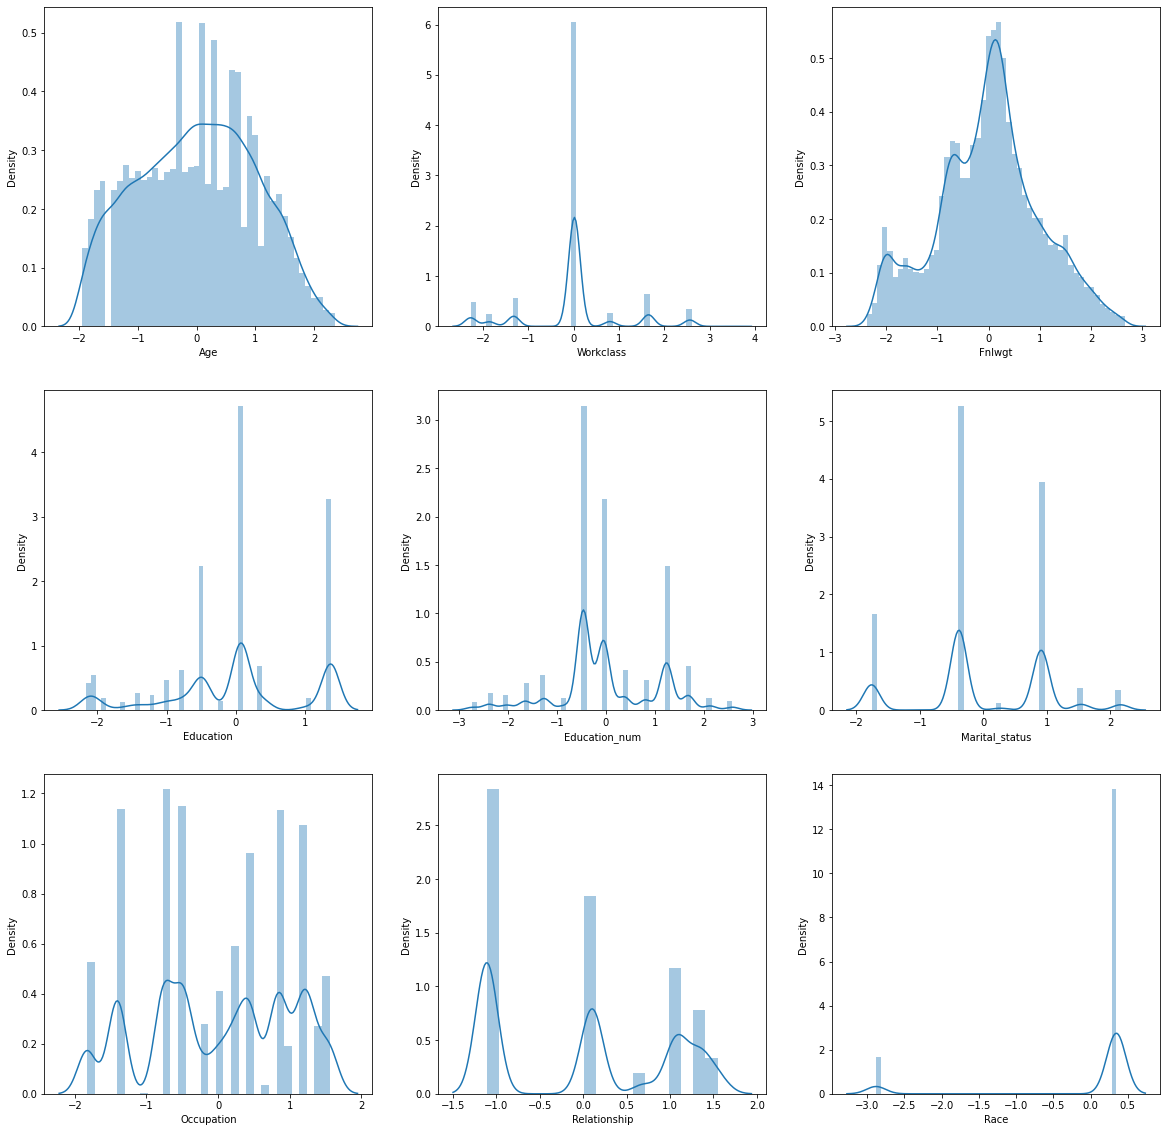

In [34]:
# Distibution after fixing skew and outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data_new:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_new[i])
        plt.xlabel(i)
    plotnumber+=1

In [35]:
x = data_new

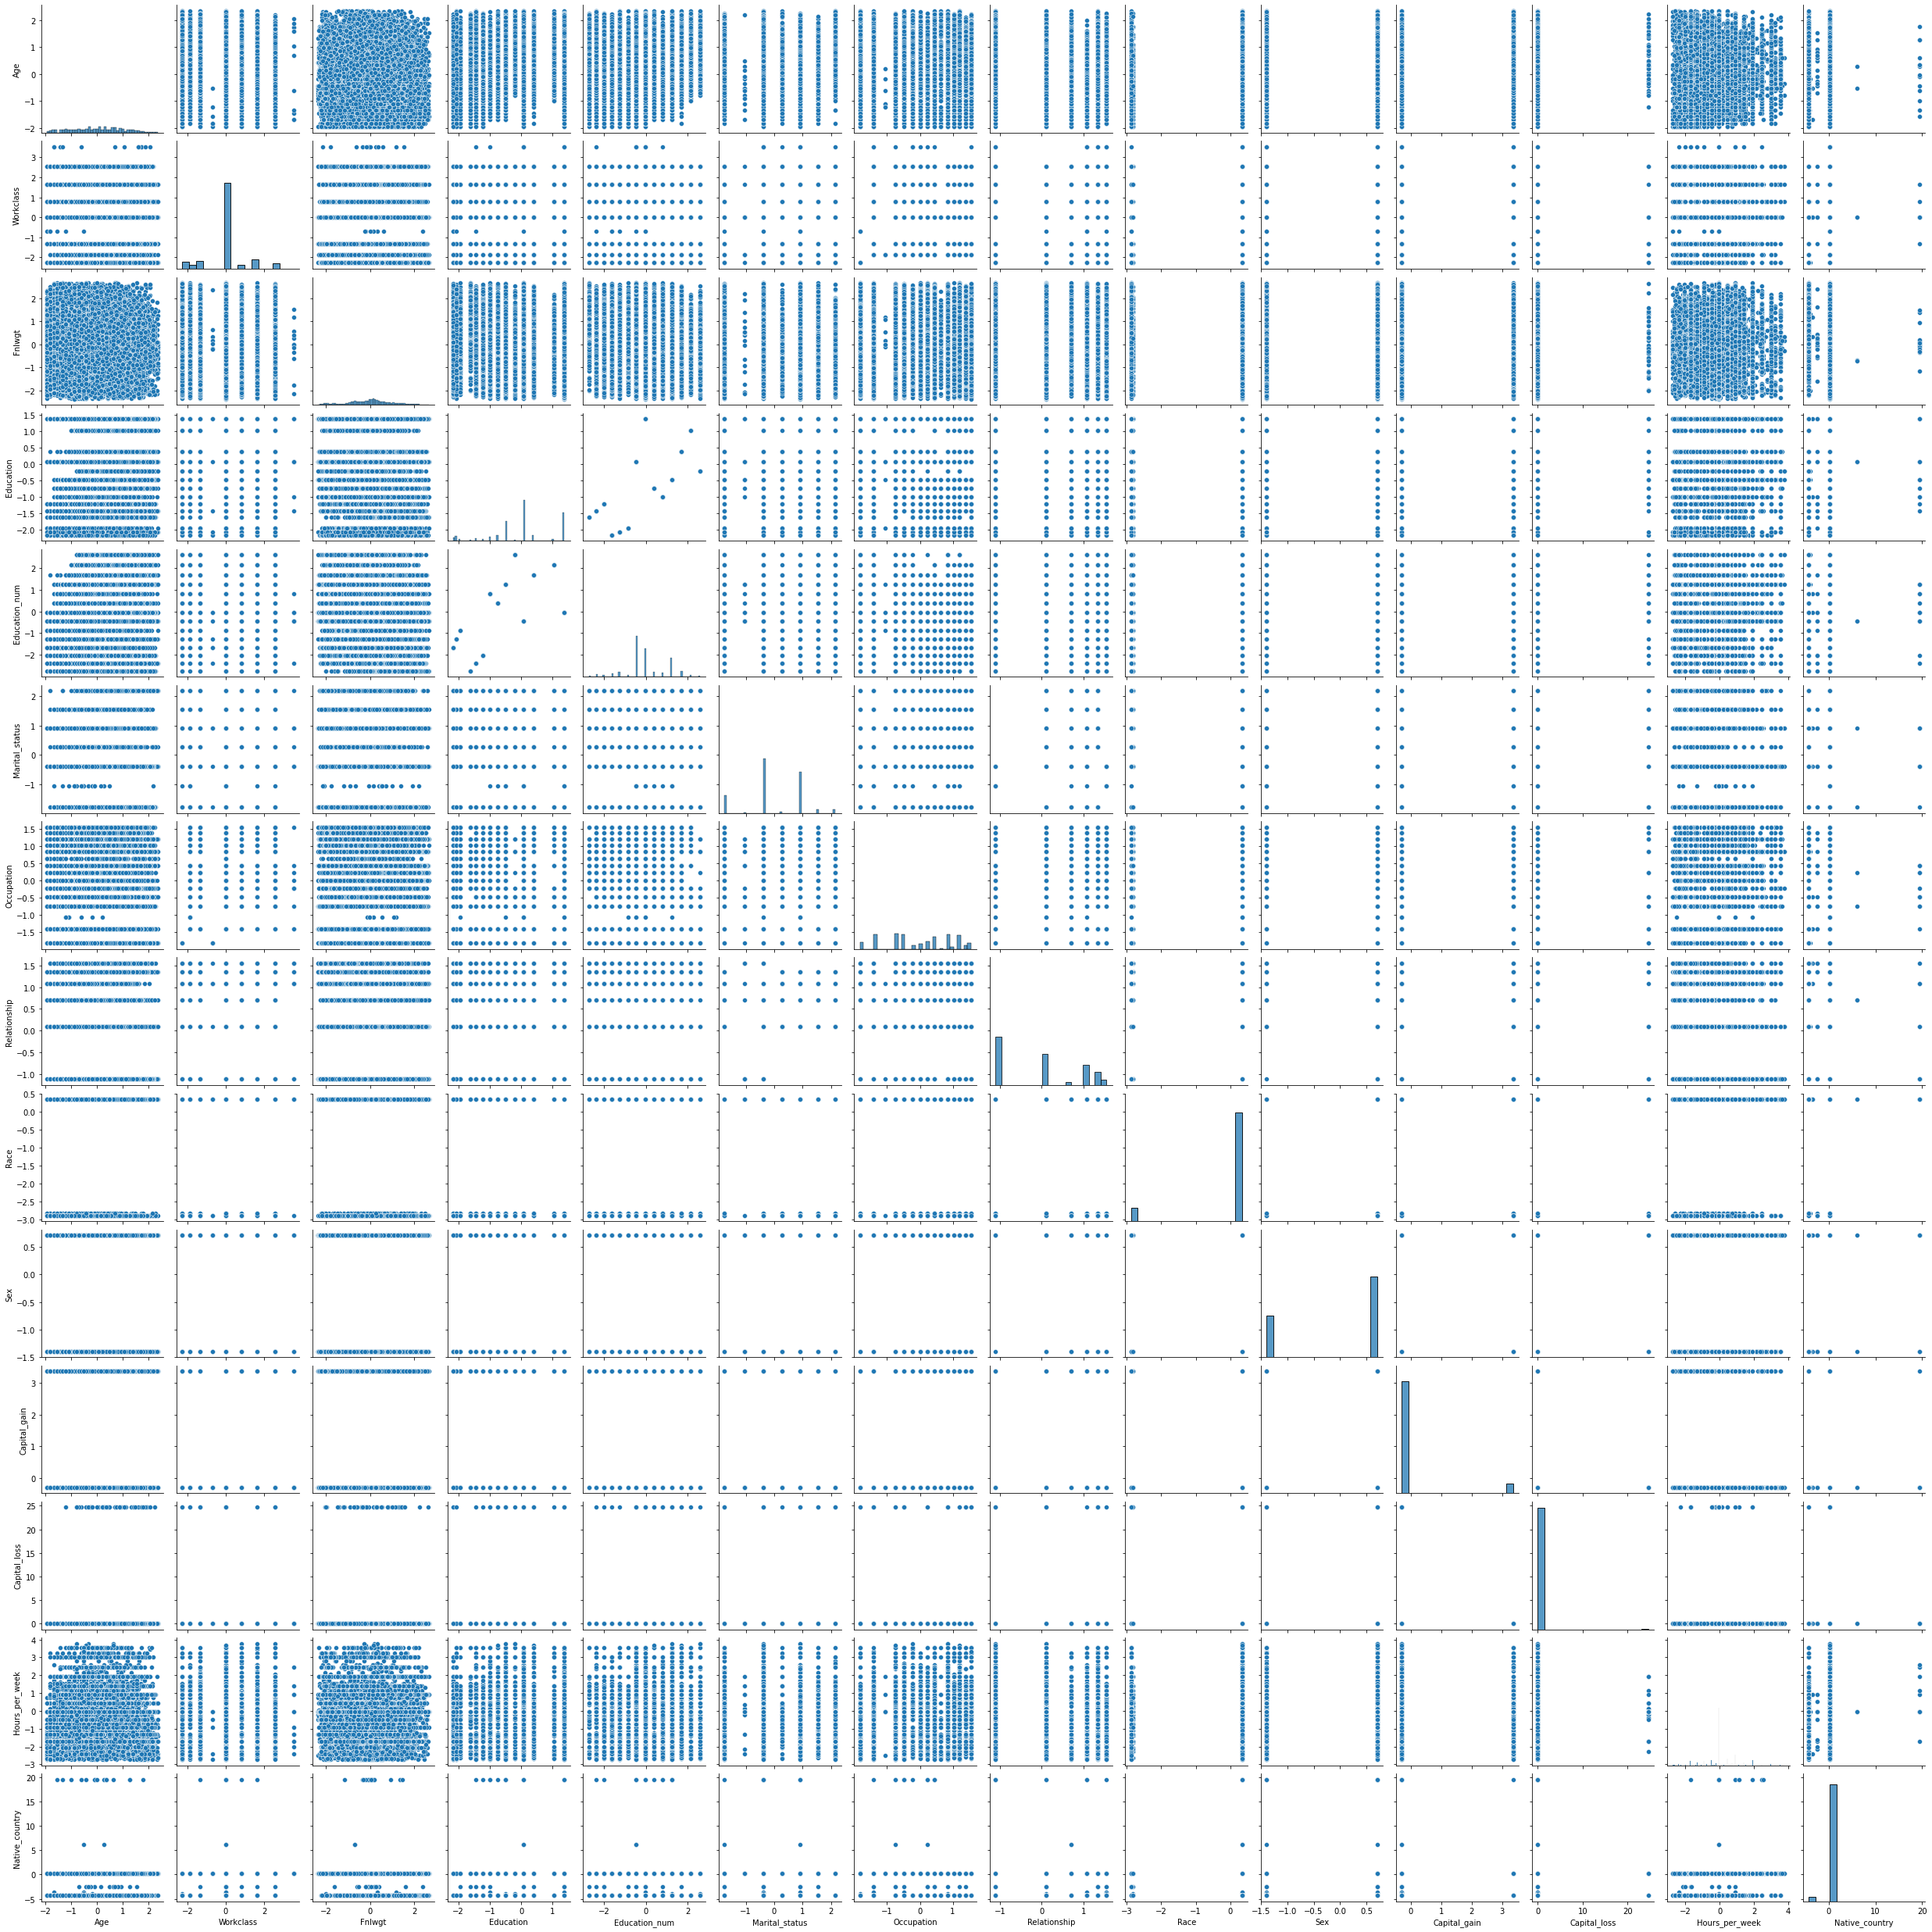

In [36]:
# Pairplot of df
sns.pairplot(x)

In [37]:
# Treating data imbalance
from imblearn.over_sampling import ADASYN

counter = Counter(y)
print(counter)
oversample = ADASYN()
x, y = oversample.fit_resample(x, y)
counter = Counter(y)
print(counter)

Counter({0: 21279, 1: 6138})
Counter({0: 21279, 1: 20082})


## Model

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [39]:
#Classifiers :
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svm=SVC(probability=True)

m_list = [knn,dt,rf,svm]

In [40]:
# Fitting Models
for m in m_list:
    m.fit(x_train,y_train)
#     Training------->>>>>
    print(m)
    train_preds = m.predict(x_train)
    print('Accuracy Score :',accuracy_score(y_train,train_preds)*100)
    
#     Testing------->>>>>>
    print(m)
    test_preds = m.predict(x_test)
    te_acc = accuracy_score(y_test,test_preds)*100
    print('Accuracy Score :',accuracy_score(y_test,test_preds)*100)
    
    
#     CV-------->>>>>
    print('cross validation scores below:--  \n',m)
    scr=cross_val_score(m,x,y,cv=5)
    print('Cross validation score : ',scr.mean()*100)
    print('Difference between CV_score and acc : ',(te_acc-scr.mean()*100))
    print('\n')
    print('\n')

KNeighborsClassifier()
Accuracy Score : 88.77820760799484
KNeighborsClassifier()
Accuracy Score : 84.00541533700803
cross validation scores below:--  
 KNeighborsClassifier()
Cross validation score :  82.87512148886371
Difference between CV_score and acc :  1.1302938481443192




DecisionTreeClassifier()
Accuracy Score : 100.0
DecisionTreeClassifier()
Accuracy Score : 85.40760081230056
cross validation scores below:--  
 DecisionTreeClassifier()
Cross validation score :  83.87388064831157
Difference between CV_score and acc :  1.5337201639889884




RandomForestClassifier()
Accuracy Score : 99.99677627337202
RandomForestClassifier()
Accuracy Score : 89.53679528092061
cross validation scores below:--  
 RandomForestClassifier()
Cross validation score :  89.25327485112135
Difference between CV_score and acc :  0.2835204297992675




SVC(probability=True)
Accuracy Score : 81.38942617666022
SVC(probability=True)
Accuracy Score : 80.14698771878929
cross validation scores below:--  
 SVC(pro

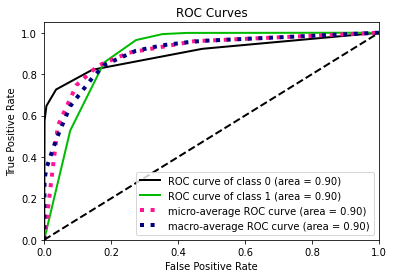

In [41]:
probas=knn.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

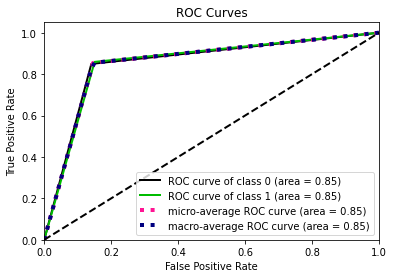

In [42]:
probas=dt.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

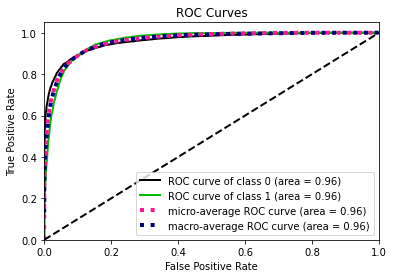

In [43]:
probas=rf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

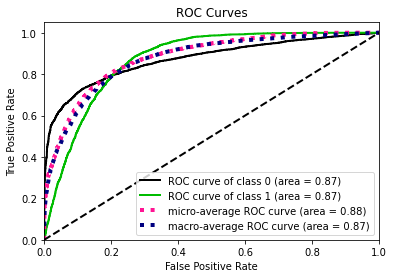

In [44]:
probas=svm.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

### <b> We can see that SVC would be ideal but my system takes too long to fit each model so I have chosen DT for HPT

## Hyper-Parameter Tuning (HPT)

In [64]:
# Parameter Grid
grid_param={'criterion':['gini','entropy'],
            'max_depth':range(8,26,2),
            'min_samples_leaf':range(22,40,2),
            'min_samples_split':range(10,50,2)}

In [65]:
grid_search=GridSearchCV(dt,param_grid=grid_param,cv=5,n_jobs=15,verbose = 1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 3240 candidates, totalling 16200 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=18,
                                              min_samples_leaf=28,
                                              min_samples_split=22),
             n_jobs=15,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(8, 26, 2),
                         'min_samples_leaf': range(22, 40, 2),
                         'min_samples_split': range(10, 50, 2)},
             verbose=1)

In [66]:
# Best Parameters
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 24,
 'min_samples_leaf': 26,
 'min_samples_split': 14}

In [67]:
# Model Fitted with best Parameters
dt=DecisionTreeClassifier(criterion='gini', max_depth=24, min_samples_leaf=26, min_samples_split=14)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [68]:
accuracy_score(y_test,y_pred)*100

83.48322212551977

In [69]:
# Classification report of Best model
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.853659,0.815738,0.834832,0.834698,0.835507
recall,0.824522,0.846061,0.834832,0.835291,0.834832
f1-score,0.838838,0.830623,0.834832,0.834730,0.834905
support,5391.000000,4950.000000,0.834832,10341.000000,10341.000000


In [71]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

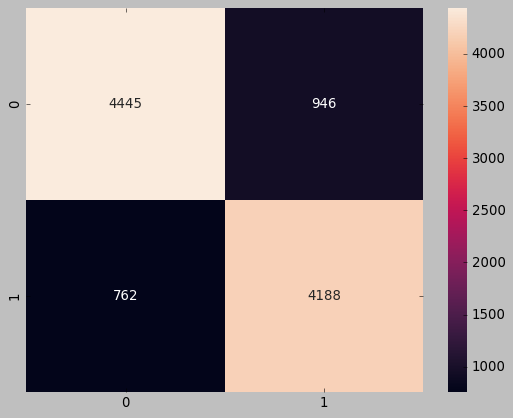

In [78]:
sns.heatmap(cm,annot=True,fmt='d')
plt.savefig('heatmap.png')
plt.show()

### Model Saving 

In [79]:
import joblib

joblib.dump(dt,'DT_best.obj')

['DT_best.obj']

In [80]:
joblib.load('DT_best.obj')

DecisionTreeClassifier(max_depth=24, min_samples_leaf=26, min_samples_split=14)